Accuracy: 0.92
Confusion Matrix:
 [[89  0]
 [ 8  3]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        89
           1       1.00      0.27      0.43        11

    accuracy                           0.92       100
   macro avg       0.96      0.64      0.69       100
weighted avg       0.93      0.92      0.90       100



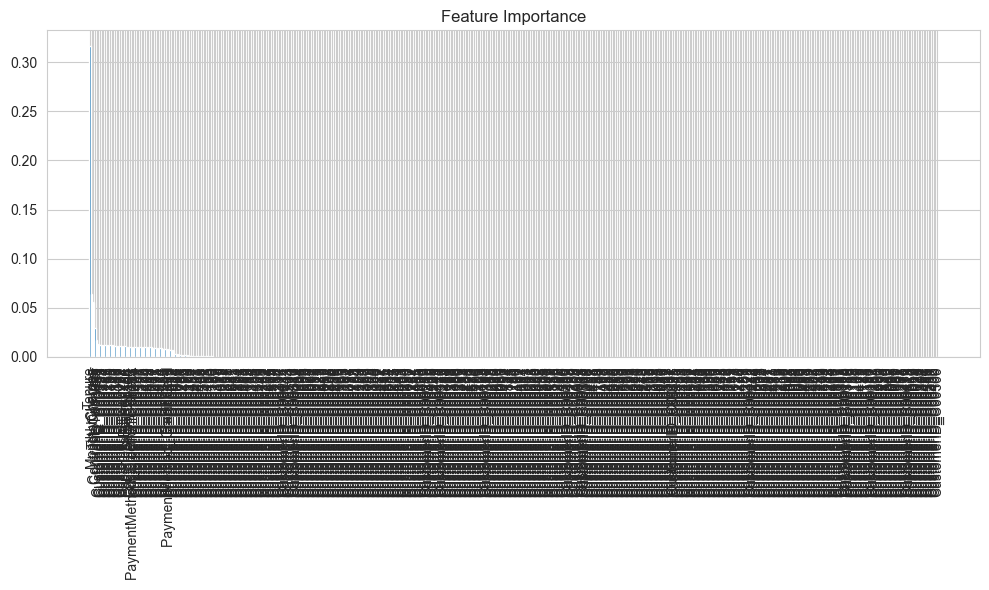

Sample Prediction: 0
Actual Value: 0
Customer churn model saved


C:\Users\hello\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)

df = pd.read_csv("../datasets/customer_churn.csv")
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

target_col = 'Churn'
X = df.drop(target_col, axis=1)
y = df[target_col]

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

sample = X_test.iloc[0:1]
predicted = rf.predict(sample)[0]
actual = y_test.iloc[0]
print("Sample Prediction:", predicted)
print("Actual Value:", actual)

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Customer churn model saved")
